In [33]:
import numpy as np 
import pickle 
import cv2
from os import remove
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
image_path= "color"
mask_path="segmented"

In [6]:
def read_file_image(directory_root,index):
    image_name_list,image_list, mask_list=[],[],[]
    try :
        plant_folder = listdir(directory_root)   
        #for plant_disease_folder in plant_folder:
        print (f"[INFO] Processing {plant_folder[index]}...")
        plant_disease_image_list = listdir(f"{directory_root}/{plant_folder[index]}")
        
        for image in plant_disease_image_list:
            #image_directory=f"{directory_root}/{plant_disease_folder}/{image}"
            image_name_list.append(image)
                
                #if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                    #image_list.append(cv2.imread(image_directory))
                    #label_list.append(plant_disease_folder)
    except Exception as e:
        print (f"Error :{e}")
        
    return image_name_list

In [42]:
def delete_file_image(file_list,directory_root,index):
    try:
        plant_folder=listdir(directory_root)
        print (f"[INFO] Processing {plant_folder[index]}...")
        plant_disease_image_list = listdir(f"{directory_root}/{plant_folder[index]}")
        
        for image in file_list:
            image_directory=f"{directory_root}/{plant_folder[index]}/{image}"
            to_be_deleted=image_directory.replace(".jpg",".JPG")
            remove(to_be_deleted)
            print(f"[INFO] Deleted ... {image_directory}")
            print(f"[INFO] Total files deleted {len(file_list)}")
    
    except Exception as e :
        print(f"Error:{e}")

In [30]:
def no_mask_image(image,mask):
    dif_image=[]
    for i in image:
        flag=False
        for j in mask:
            if i==j:
                flag=True
        if flag==False :
            dif_image.append(i)
    return dif_image

In [76]:
def binarize_masks(directory_root,save_root):
    kernel = np.ones((5,5),np.uint8)
    try:
        plant_folder = listdir(directory_root)   
        for plant_disease_folder in plant_folder:
            print (f"[INFO] Processing {plant_disease_folder}...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_disease_folder}")
            
            for image in plant_disease_image_list:
                image_directory=f"{directory_root}/{plant_disease_folder}/{image}"
                  
                if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                    image_gray=cv2.imread(image_directory,0)
                    image_gray=np.where(image_gray!=0,255,0)
                    image_gray=np.array(image_gray,np.uint8)
                    erosion = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
                    cv2.imwrite(f"{save_root}/{plant_disease_folder}/{image}",erosion)
                
    except Exception as e :
        print(f"Error:{e}")

In [45]:
def main():
    index_list=[x for x in range(38)]
    for index in index_list:
        all_image= read_file_image(image_path,index)
        all_masks=read_file_image(mask_path,index)
        image = [x.replace("JPG","jpg") for x in all_image]
        mask =[x.replace("_final_masked.jpg",".jpg") for x in all_masks]
        dif = no_mask_image(image,mask)
        delete_file_image(dif,image_path,index)

In [46]:
main()

[INFO] Processing Apple___Apple_scab...
[INFO] Processing Apple___Apple_scab...
[INFO] Processing Apple___Apple_scab...
[INFO] Deleted ... color/Apple___Apple_scab/08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.jpg
[INFO] Total files deleted 44
[INFO] Deleted ... color/Apple___Apple_scab/0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131.jpg
[INFO] Total files deleted 44
[INFO] Deleted ... color/Apple___Apple_scab/10072248-60e2-4190-b4df-14e8ab61008c___FREC_Scab 3445.jpg
[INFO] Total files deleted 44
[INFO] Deleted ... color/Apple___Apple_scab/1637ad84-640c-41e7-9be7-6d8e7769b875___FREC_Scab 3110.jpg
[INFO] Total files deleted 44
[INFO] Deleted ... color/Apple___Apple_scab/1d9d67e2-5603-4710-ae2b-6cb0b922ae61___FREC_Scab 3122.jpg
[INFO] Total files deleted 44
[INFO] Deleted ... color/Apple___Apple_scab/268a2ad1-d649-4ec0-add3-61cc8f54f479___FREC_Scab 3235.jpg
[INFO] Total files deleted 44
[INFO] Deleted ... color/Apple___Apple_scab/2a59761b-c91c-451c-8e13-d9dc3aff8d29___FREC_

[INFO] Processing Blueberry___healthy...
[INFO] Deleted ... color/Blueberry___healthy/02a9797d-ff35-4abb-9f0a-33a86208f2a0___RS_HL 0546.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/1ce44f80-a40e-436c-b885-e8bedc330e83___RS_HL 0544.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/22a0258a-0a1e-4dd8-ad7d-346c4e3ab14c___RS_HL 0536.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/48f52b2d-ed1c-4dcc-a921-d5660214cd75___RS_HL 0341.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/67ce2dd3-b5f2-4517-a2ce-2066706b19d4___RS_HL 0382.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/73076d5a-bdf7-4a80-aa7f-ea6ac6d03bea___RS_HL 0439.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/a6fde3d0-16fb-4364-8b20-bd161b8d5c4c___RS_HL 0584.jpg
[INFO] Total files deleted 11
[INFO] Deleted ... color/Blueberry___healthy/ad8a8ab9-0d

[INFO] Processing Corn_(maize)___Common_rust_...
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1563.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1564.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1565.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1566.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1567.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1568.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1569.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1570.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1571.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(ma

[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1993.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1994.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1995.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1996.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1997.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1998.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 1999.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2000.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2001.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2002.jpg
[INFO] Total

[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2369.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2370.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2371.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2372.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2373.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2374.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2375.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2376.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2377.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2378.jpg
[INFO] Total

[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2626.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2627.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2628.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2629.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2630.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2631.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2632.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2633.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2634.jpg
[INFO] Total files deleted 1192
[INFO] Deleted ... color/Corn_(maize)___Common_rust_/RS_Rust 2635.jpg
[INFO] Total

[INFO] Processing Corn_(maize)___healthy...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight...
[INFO] Deleted ... color/Corn_(maize)___Northern_Leaf_Blight/02504be2-4192-42f3-957d-df2841103562___RS_NLB 3955 copy.jpg
[INFO] Total files deleted 55
[INFO] Deleted ... color/Corn_(maize)___Northern_Leaf_Blight/02eee796-1a1e-4d63-8247-a6aac6bfb272___RS_NLB 3546.jpg
[INFO] Total files deleted 55
[INFO] Deleted ... color/Corn_(maize)___Northern_Leaf_Blight/04d8e1d6-766e-4fcc-9bac-42efb9e6ad33___RS_NLB 3620.jpg
[INFO] Total files deleted 55
[INFO] Deleted ... color/Corn_(maize)___Northern_Leaf_Blight/057c3f91-c15e-464b-b4ba-66b16dbe5149___RS_NLB 3565 copy.jpg
[INFO] Total files deleted 55
[INFO] Deleted ... color/Corn_(maize)___Northern_Leaf_Blight/08afb40d-4814-481d-a0a7-760034a2e81b___RS_NLB 3657.jpg
[INFO] Total files deleted 55
[INFO] Deleted ... color/Corn_(maize)___North

[INFO] Processing Grape___Black_rot...
[INFO] Deleted ... color/Grape___Black_rot/08a7300a-1e67-4441-9521-9168d47cd665___FAM_B.Rot 3020.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/12913612-fce1-49ac-99fc-779e1ce7809c___FAM_B.Rot 5024.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/150f2f38-a17a-4d8b-9ba2-406c8d2e7b8a___FAM_B.Rot 3119.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/1f20a91e-f33c-4e38-937d-ee259477211e___FAM_B.Rot 5016.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/252822b9-3c03-4206-92ad-81c509e2c38a___FAM_B.Rot 5023.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/2e9ce8b1-28a5-4a47-8b66-8ffdce48f100___FAM_B.Rot 5027.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/302b14ac-d6aa-43af-95a6-fb305454c6ab___FAM_B.Rot 0587.jpg
[INFO] Total files deleted 31
[INFO] Deleted ... color/Grape___Black_rot/3

[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...
[INFO] Deleted ... color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/2bab428e-519b-4e4e-95db-45d88765a486___FAM_L.Blight 4907.jpg
[INFO] Total files deleted 23
[INFO] Deleted ... color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/31cae071-a2b2-4bbe-9127-378381126df4___FAM_L.Blight 4963.jpg
[INFO] Total files deleted 23
[INFO] Deleted ... color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/402e809f-6fed-46a4-bf4d-3a78431c1555___FAM_L.Blight 4577.jpg
[INFO] Total files deleted 23
[INFO] Deleted ... color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/41c65d0e-d314-4784-b15c-005c6ac64402___FAM_L.Blight 4975.jpg
[INFO] Total files deleted 23
[INFO] Deleted ... color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/48470e3f-9bf0-4d77-86a2-68e312cd8263___FAM_L.Blight 4947.jpg
[INFO] Total files deleted 23
[INFO] Deleted ... color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/54fda0a2-0d5f-4a76-9bd5-3ac70fc5fe87___FAM_L.Blight 4807.jpg
[INFO] Total

[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbing_(Citrus_greening)/c7913cc4-8bdd-4c80-88c7-3447ffa5c9df___CREC_HLB 4665.jpg
[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbing_(Citrus_greening)/c849a95f-a064-4e28-b880-1a2acd82faae___CREC_HLB 7885.jpg
[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbing_(Citrus_greening)/c8c4d2ed-06d1-4823-8498-7483cc14a5ee___CREC_HLB 7888.jpg
[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbing_(Citrus_greening)/c9cb7c36-759d-4705-87a0-af73602fd220___CREC_HLB 5491.jpg
[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbing_(Citrus_greening)/ca18cb23-ea97-47c0-abbd-922be1600be6___CREC_HLB 5160.jpg
[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbing_(Citrus_greening)/cbf96299-f678-4046-b9b4-c2afcda2b838___CREC_HLB 5645.jpg
[INFO] Total files deleted 359
[INFO] Deleted ... color/Orange___Haunglongbi

[INFO] Processing Peach___Bacterial_spot...
[INFO] Deleted ... color/Peach___Bacterial_spot/02d4dbb4-cf3e-4101-a97d-f9a1885921dc___Rutg._Bact.S 1190.jpg
[INFO] Total files deleted 35
[INFO] Deleted ... color/Peach___Bacterial_spot/0b6513ec-a7eb-40c7-9a42-82300fd8f216___Rut._Bact.S 3420.jpg
[INFO] Total files deleted 35
[INFO] Deleted ... color/Peach___Bacterial_spot/158aa34f-f25b-4011-974f-434b6b482c92___Rutg._Bact.S 1491.jpg
[INFO] Total files deleted 35
[INFO] Deleted ... color/Peach___Bacterial_spot/1d910253-b8d8-4af4-93f9-cf4a76db36a0___Rutg._Bact.S 1235.jpg
[INFO] Total files deleted 35
[INFO] Deleted ... color/Peach___Bacterial_spot/213dd715-6255-4225-805a-0ac2a5f4c8b0___Rutg._Bact.S 1095.jpg
[INFO] Total files deleted 35
[INFO] Deleted ... color/Peach___Bacterial_spot/29ba44c8-82f6-4841-b70c-1bcee8e3f5b9___Rut._Bact.S 3430.jpg
[INFO] Total files deleted 35
[INFO] Deleted ... color/Peach___Bacterial_spot/2b6bb683-41fa-46c4-81a0-3a4853f4dd98___Rutg._Bact.S 1293.jpg
[INFO] Total fi

[INFO] Processing Pepper,_bell___healthy...
[INFO] Deleted ... color/Pepper,_bell___healthy/084a1485-7006-4277-bd4f-5b9e766cfd24___JR_HL 7892.jpg
[INFO] Total files deleted 20
[INFO] Deleted ... color/Pepper,_bell___healthy/118ec2cf-48d0-4bb9-9487-612ea61471a1___JR_HL 7730.jpg
[INFO] Total files deleted 20
[INFO] Deleted ... color/Pepper,_bell___healthy/277eb282-4e80-4da6-8efe-740354fa368e___JR_HL 5995.jpg
[INFO] Total files deleted 20
[INFO] Deleted ... color/Pepper,_bell___healthy/279a5c86-76d2-4c9d-9293-9ce666ced419___JR_HL 7893.jpg
[INFO] Total files deleted 20
[INFO] Deleted ... color/Pepper,_bell___healthy/3306b49b-e3b3-4450-8609-ae44ab2b6593___bell-pepper-plant-61726.jpg
[INFO] Total files deleted 20
[INFO] Deleted ... color/Pepper,_bell___healthy/42f083e2-272d-4f83-ad9a-573ee90e50ec___Screen Shot 2015-05-06 at 4.01.13 PM.png
[INFO] Total files deleted 20
[INFO] Deleted ... color/Pepper,_bell___healthy/4cdfdfb8-1efa-4a4f-af25-1e968c3aa38c___JR_HL 7607.jpg
[INFO] Total files dele

[INFO] Processing Soybean___healthy...
[INFO] Deleted ... color/Soybean___healthy/41849ab5-a005-4f73-9f7c-9aac708e97a0___RS_HL 2855.jpg
[INFO] Total files deleted 5
[INFO] Deleted ... color/Soybean___healthy/5e85916d-d71c-447a-b21b-c1c9434c0c37___RS_HL 3619.jpg
[INFO] Total files deleted 5
[INFO] Deleted ... color/Soybean___healthy/5f6b2d29-378e-4260-a69b-7bdeea212aab___RS_HL 2858.jpg
[INFO] Total files deleted 5
[INFO] Deleted ... color/Soybean___healthy/92203acd-cf00-485b-9128-2238c97680eb___RS_HL 2703.jpg
[INFO] Total files deleted 5
[INFO] Deleted ... color/Soybean___healthy/b32e4516-9cd7-4226-be52-26f413c97834___RS_HL 3512.jpg
[INFO] Total files deleted 5
[INFO] Processing Squash___Powdery_mildew...
[INFO] Processing Squash___Powdery_mildew...
[INFO] Processing Squash___Powdery_mildew...
[INFO] Deleted ... color/Squash___Powdery_mildew/04f7f7e4-c94a-4a9f-932f-9e54384a3d01___MD_Powd.M 0153.jpg
[INFO] Total files deleted 16
[INFO] Deleted ... color/Squash___Powdery_mildew/0b6c2fae-c

[INFO] Deleted ... color/Strawberry___Leaf_scorch/e821c563-d9f1-4e43-ad29-e85282ce80d9___RS_L.Scorch 0075.jpg
[INFO] Total files deleted 119
[INFO] Deleted ... color/Strawberry___Leaf_scorch/e9d15f1c-6ff9-4220-918d-96a726279081___RS_L.Scorch 9960.jpg
[INFO] Total files deleted 119
[INFO] Deleted ... color/Strawberry___Leaf_scorch/e9f7de15-8ed4-4c7b-9c04-223b0e00de81___RS_L.Scorch 9904.jpg
[INFO] Total files deleted 119
[INFO] Deleted ... color/Strawberry___Leaf_scorch/ec420b87-6622-4477-aae7-bc87166e7aa0___RS_L.Scorch 1089.jpg
[INFO] Total files deleted 119
[INFO] Deleted ... color/Strawberry___Leaf_scorch/eccc2000-fb04-4c85-8a90-11498d11addd___RS_L.Scorch 9945.jpg
[INFO] Total files deleted 119
[INFO] Deleted ... color/Strawberry___Leaf_scorch/edf78517-a51f-4315-af31-9fa1e6913f47___RS_L.Scorch 0827.jpg
[INFO] Total files deleted 119
[INFO] Deleted ... color/Strawberry___Leaf_scorch/ee7d25d9-bb62-44ea-b70c-63ae7a05bc9f___RS_L.Scorch 9997.jpg
[INFO] Total files deleted 119
[INFO] Delete

[INFO] Processing Tomato___healthy...
[INFO] Deleted ... color/Tomato___healthy/0f5a5880-c1f1-4356-8336-d65c69b54cc1___GH_HL Leaf 380.1jpg.jpg
[INFO] Total files deleted 3
[INFO] Deleted ... color/Tomato___healthy/7de93009-6180-4027-8779-76947cda3e2f___2700323949_95aa2eaa01_o.jpg
[INFO] Total files deleted 3
[INFO] Deleted ... color/Tomato___healthy/c11a3cf1-de74-421e-89d0-11ea1508673d___RS_HL 0185.jpg
[INFO] Total files deleted 3
[INFO] Processing Tomato___Late_blight...
[INFO] Processing Tomato___Late_blight...
[INFO] Processing Tomato___Late_blight...
[INFO] Deleted ... color/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.jpg
[INFO] Total files deleted 278
[INFO] Deleted ... color/Tomato___Late_blight/017a9839-6097-45aa-85b0-3051db151484___RS_Late.B 5125.jpg
[INFO] Total files deleted 278
[INFO] Deleted ... color/Tomato___Late_blight/01d9be0b-c5e7-49db-8cdf-46bd0ef2c6e7___RS_Late.B 7066.jpg
[INFO] Total files deleted 278
[INFO] Deleted ... color/Tomato___

[INFO] Processing Tomato___Leaf_Mold...
[INFO] Processing Tomato___Leaf_Mold...
[INFO] Deleted ... color/Tomato___Leaf_Mold/041f3e00-0236-4d32-897f-8d13f3a9aa1f___Crnl_L.Mold 9135.jpg
[INFO] Total files deleted 167
[INFO] Deleted ... color/Tomato___Leaf_Mold/0443d006-9d75-4d46-9312-941f21e3791d___Crnl_L.Mold 9139.jpg
[INFO] Total files deleted 167
[INFO] Deleted ... color/Tomato___Leaf_Mold/0595201b-049b-47ff-9e56-7e042932c0fe___Crnl_L.Mold 9179.jpg
[INFO] Total files deleted 167
[INFO] Deleted ... color/Tomato___Leaf_Mold/077218cb-00b9-4bdf-b091-108a42c7a601___Crnl_L.Mold 7118.jpg
[INFO] Total files deleted 167
[INFO] Deleted ... color/Tomato___Leaf_Mold/08cdd6ec-9dd7-4fc2-a255-11a70adaffd4___Crnl_L.Mold 9177.jpg
[INFO] Total files deleted 167
[INFO] Deleted ... color/Tomato___Leaf_Mold/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.jpg
[INFO] Total files deleted 167
[INFO] Deleted ... color/Tomato___Leaf_Mold/0ac36661-a47d-47ff-8948-42edec033b87___Crnl_L.Mold 9127.jpg
[INFO]

[INFO] Processing Tomato___Septoria_leaf_spot...
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/0a5edec2-e297-4a25-86fc-78f03772c100___JR_Sept.L.S 8468.jpg
[INFO] Total files deleted 37
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/250522aa-27e8-4238-8a1a-61dc70bb4b9d___Matt.S_CG 7557.jpg
[INFO] Total files deleted 37
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/289314a0-89cc-423e-8aad-18fb13b57059___JR_Sept.L.S 8409.jpg
[INFO] Total files deleted 37
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/2b400c69-36a9-4b78-90a0-3702cd38c896___Matt.S_CG 6876.jpg
[INFO] Total files deleted 37
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/3f310f1d-9837-4e44-ab1e-cfd22cae224b___JR_Sept.L.S 8386.jpg
[INFO] Total files deleted 37
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/5357b085-dcfe-4a9f-8e69-98b2481c8f7e___JR_Sept.L.S 8471.jpg
[INFO] Total files deleted 37
[INFO] Deleted ... color/Tomato___Septoria_leaf_spot/53f04b6f-afa0-44ca-906b-477462819a65___JR_Se

[INFO] Processing Apple___Apple_scab...
[INFO] Processing Apple___Black_rot...
[INFO] Processing Apple___Cedar_apple_rust...
[INFO] Processing Apple___healthy...
[INFO] Processing Blueberry___healthy...
[INFO] Processing Cherry_(including_sour)___healthy...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot...
[INFO] Processing Corn_(maize)___Common_rust_...
[INFO] Processing Corn_(maize)___healthy...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight...
[INFO] Processing Grape___Black_rot...
[INFO] Processing Grape___Esca_(Black_Measles)...
[INFO] Processing Grape___healthy...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening)...
[INFO] Processing Peach___Bacterial_spot...
[INFO] Processing Peach___healthy...
[INFO] Processing Pepper,_bell___Bacterial_spot...
[INFO] Processing Pepper,_bell___healthy...
[INFO] Processing Potato___Ear

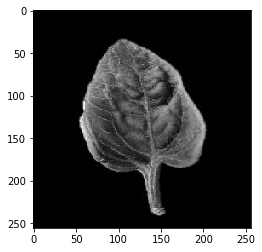

In [56]:
image_g=binarize_masks(mask_path,"")
plt.imshow(image_g,cmap='gray')

In [55]:
print(image_g.size)

65536


In [58]:
print(image_g)
image_g=np.where(image_g!=0,255,0)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


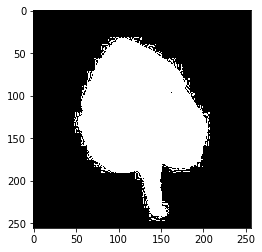

In [60]:
plt.imshow(image_g,'gray')

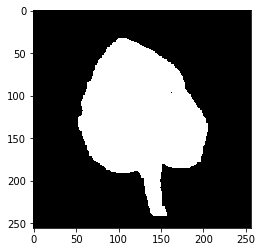

In [66]:
kernel = np.ones((5,5),np.uint8)
image_g=np.array(image_g,np.uint8)
erosion = cv2.morphologyEx(image_g, cv2.MORPH_OPEN, kernel)
#erosion =cv2.erode(image_g,kernel,iterations = 1)
plt.imshow(erosion,'gray')

In [77]:
binarize_masks(mask_path,"mask")

[INFO] Processing Apple___Apple_scab...
[INFO] Processing Apple___Black_rot...
[INFO] Processing Apple___Cedar_apple_rust...
[INFO] Processing Apple___healthy...
[INFO] Processing Blueberry___healthy...
[INFO] Processing Cherry_(including_sour)___healthy...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot...
[INFO] Processing Corn_(maize)___Common_rust_...
[INFO] Processing Corn_(maize)___healthy...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight...
[INFO] Processing Grape___Black_rot...
[INFO] Processing Grape___Esca_(Black_Measles)...
[INFO] Processing Grape___healthy...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening)...
[INFO] Processing Peach___Bacterial_spot...
[INFO] Processing Peach___healthy...
[INFO] Processing Pepper,_bell___Bacterial_spot...
[INFO] Processing Pepper,_bell___healthy...
[INFO] Processing Potato___Ear